In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import IPython.display as display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
# Function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [ ]:
# Folders for datasets
folders = {
    'train': {
        'Healthy': "/content/drive/MyDrive/Dataset/Dataset/Train/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Dataset/Train/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Dataset/Train/Rust"
    },
    'test': {
        'Healthy': "/content/drive/MyDrive/Dataset/Dataset/Test/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Dataset/Test/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Dataset/Test/Rust"
    },
    'validation': {
        'Healthy': "/content/drive/MyDrive/Dataset/Dataset/Validation/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Dataset/Validation/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Dataset/Validation/Rust"
    }
}


In [ ]:
# Display the number of files in each dataset category
for dataset_type, paths in folders.items():
    print(f"===== {dataset_type.capitalize()} Dataset =====")
    for category, path in paths.items():
        print(f"Number of {category.lower()} leaf images: {total_files(path)}")
    print("========================================================")

===== Train Dataset =====
Number of healthy leaf images: 458
Number of powdery leaf images: 430
Number of rust leaf images: 434
===== Test Dataset =====


In [ ]:
# Function to display images from a specific path
def display_image(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))

# Display example images

In [ ]:
display_image('/content/drive/MyDrive/Dataset/Dataset/Train/Healthy/802b59956a7aa5e7.jpg')

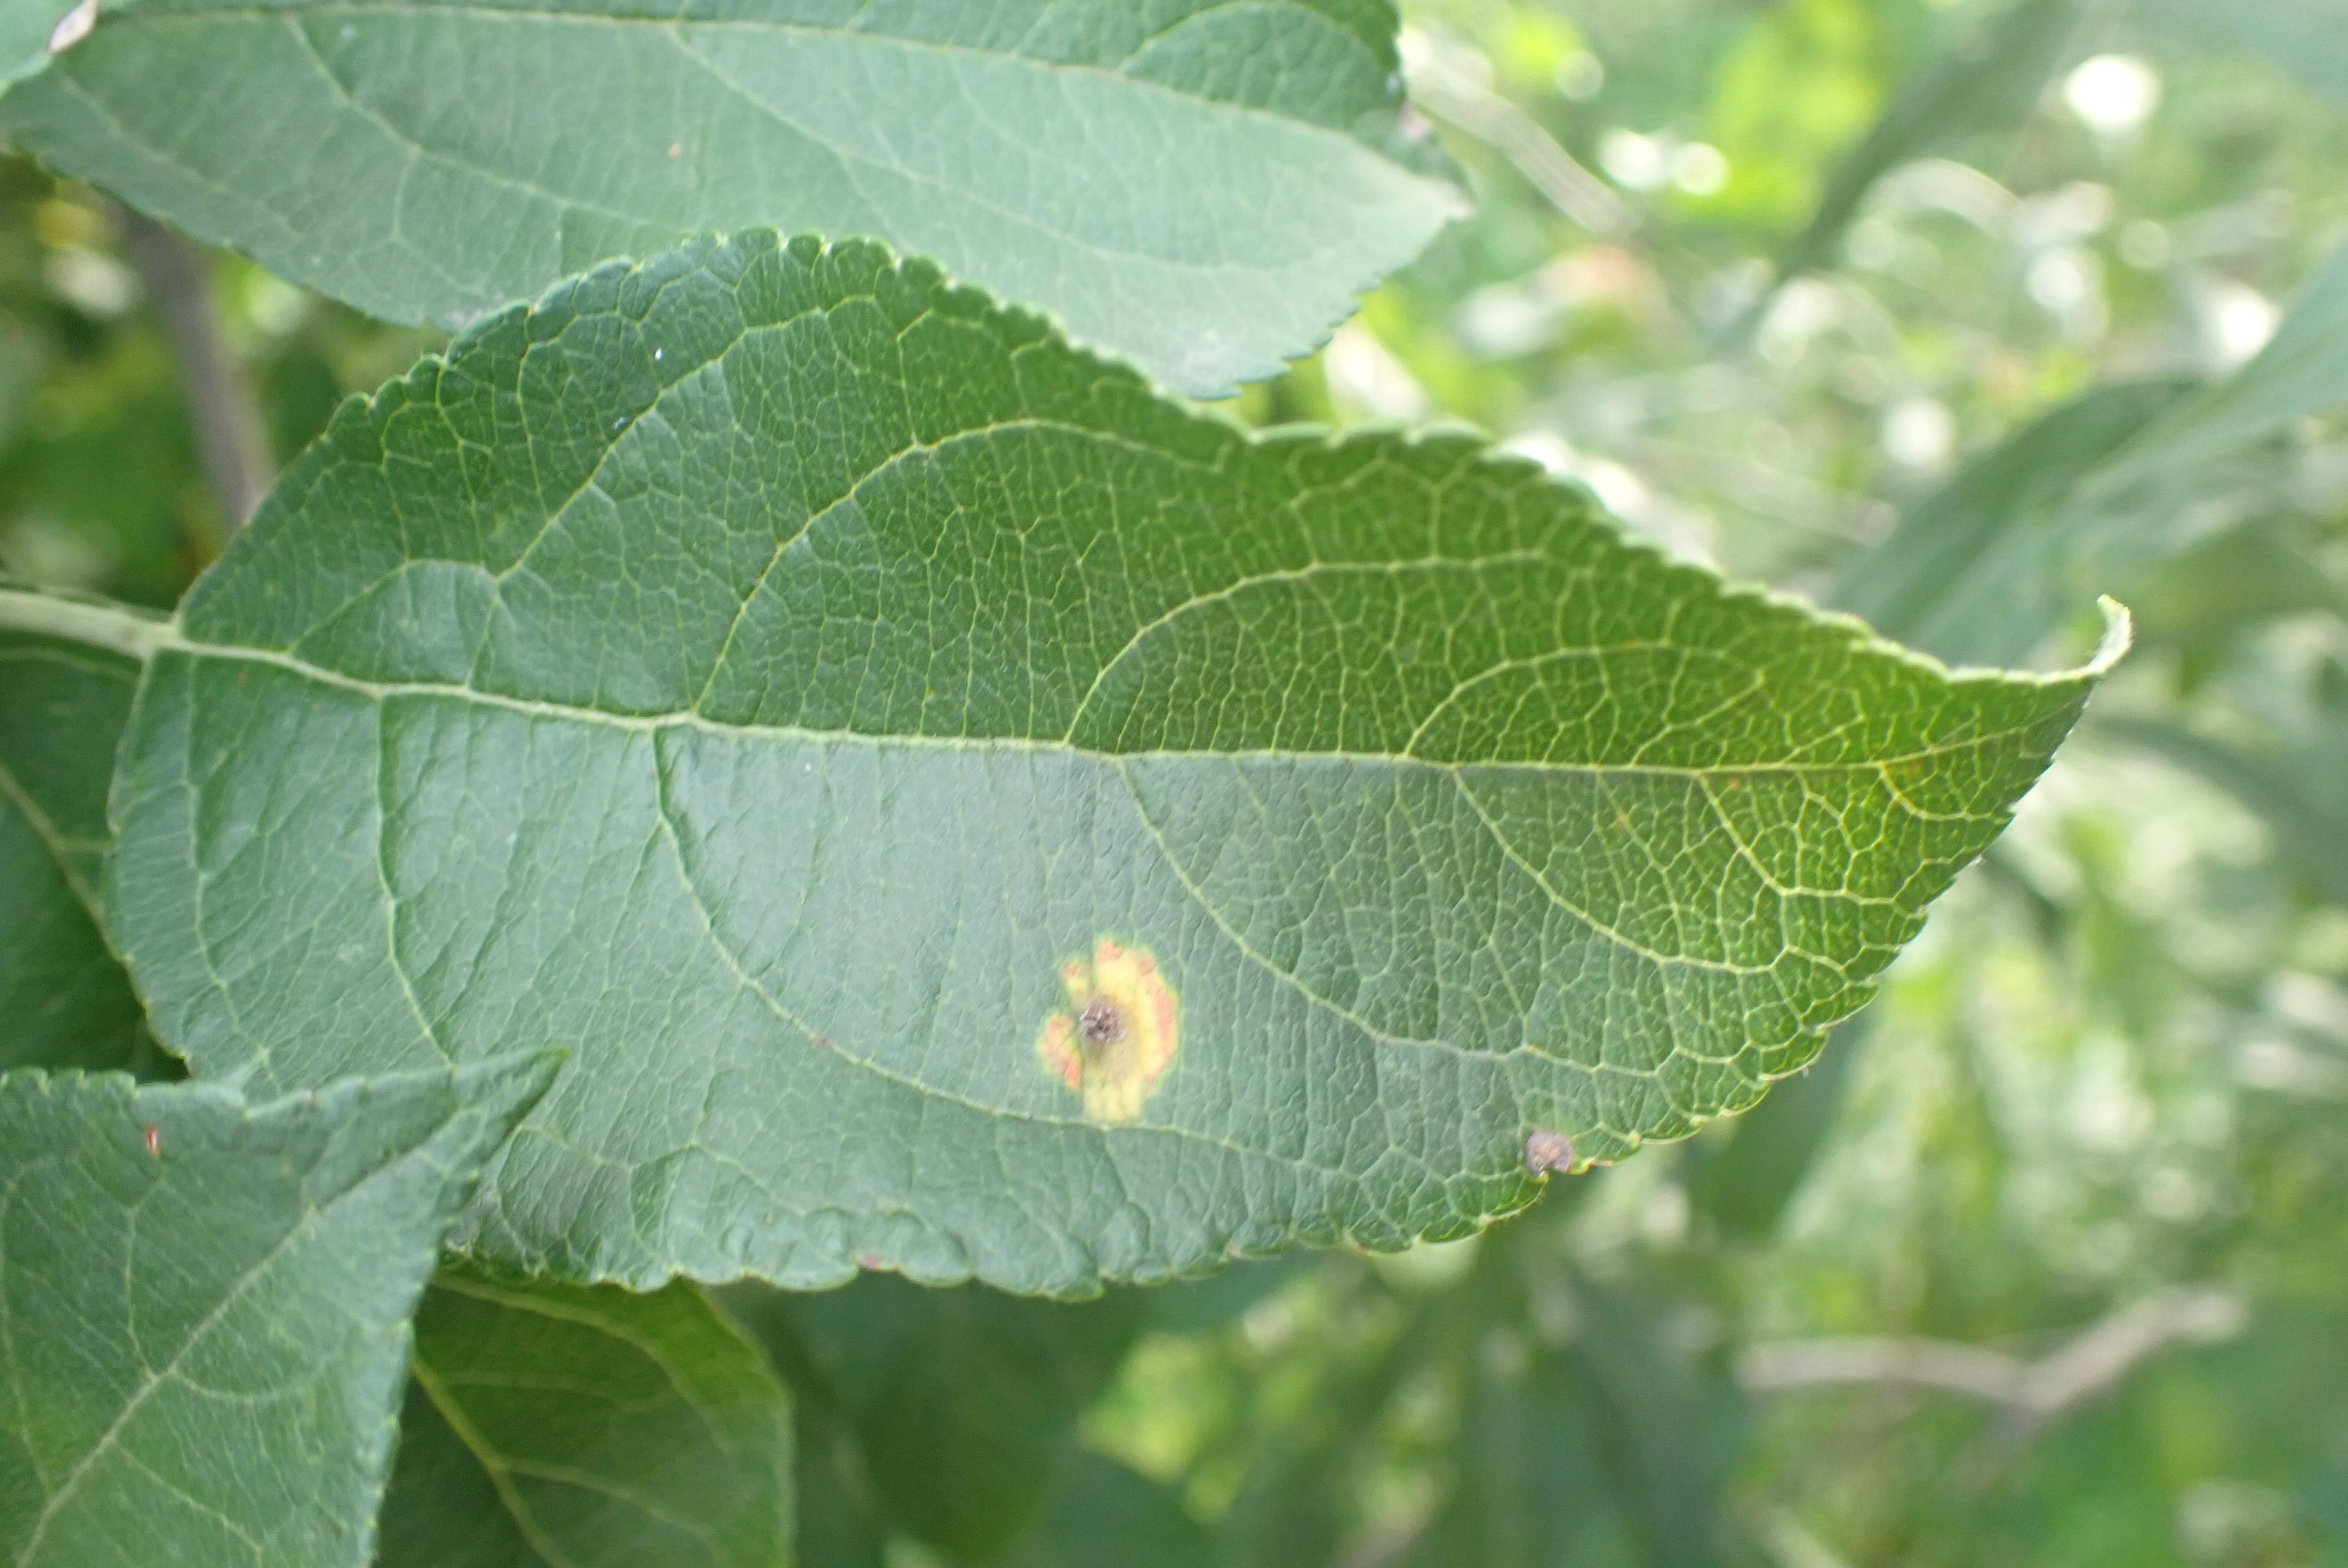

In [ ]:
display_image('/content/drive/MyDrive/Dataset/Dataset/Train/Rust/80933fcc6a673636.jpg')

In [ ]:
# Install necessary packages
!pip install tensorflow
!pip install keras

In [ ]:
# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

In [ ]:
# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 834s 17s/step - accuracy: 0.3880 - loss: 2.3224 - val_accuracy: 0.5833 - val_loss: 0.8895
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.6907 - loss: 0.6977 - val_accuracy: 0.8333 - val_loss: 0.5059
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.8187 - loss: 0.4537 - val_accuracy: 0.7833 - val_loss: 0.4656
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.8644 - loss: 0.3465 - val_accuracy: 0.7667 - val_loss: 0.5821
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.8898 - loss: 0.3094 - val_accuracy: 0.8667 - val_loss: 0.4535


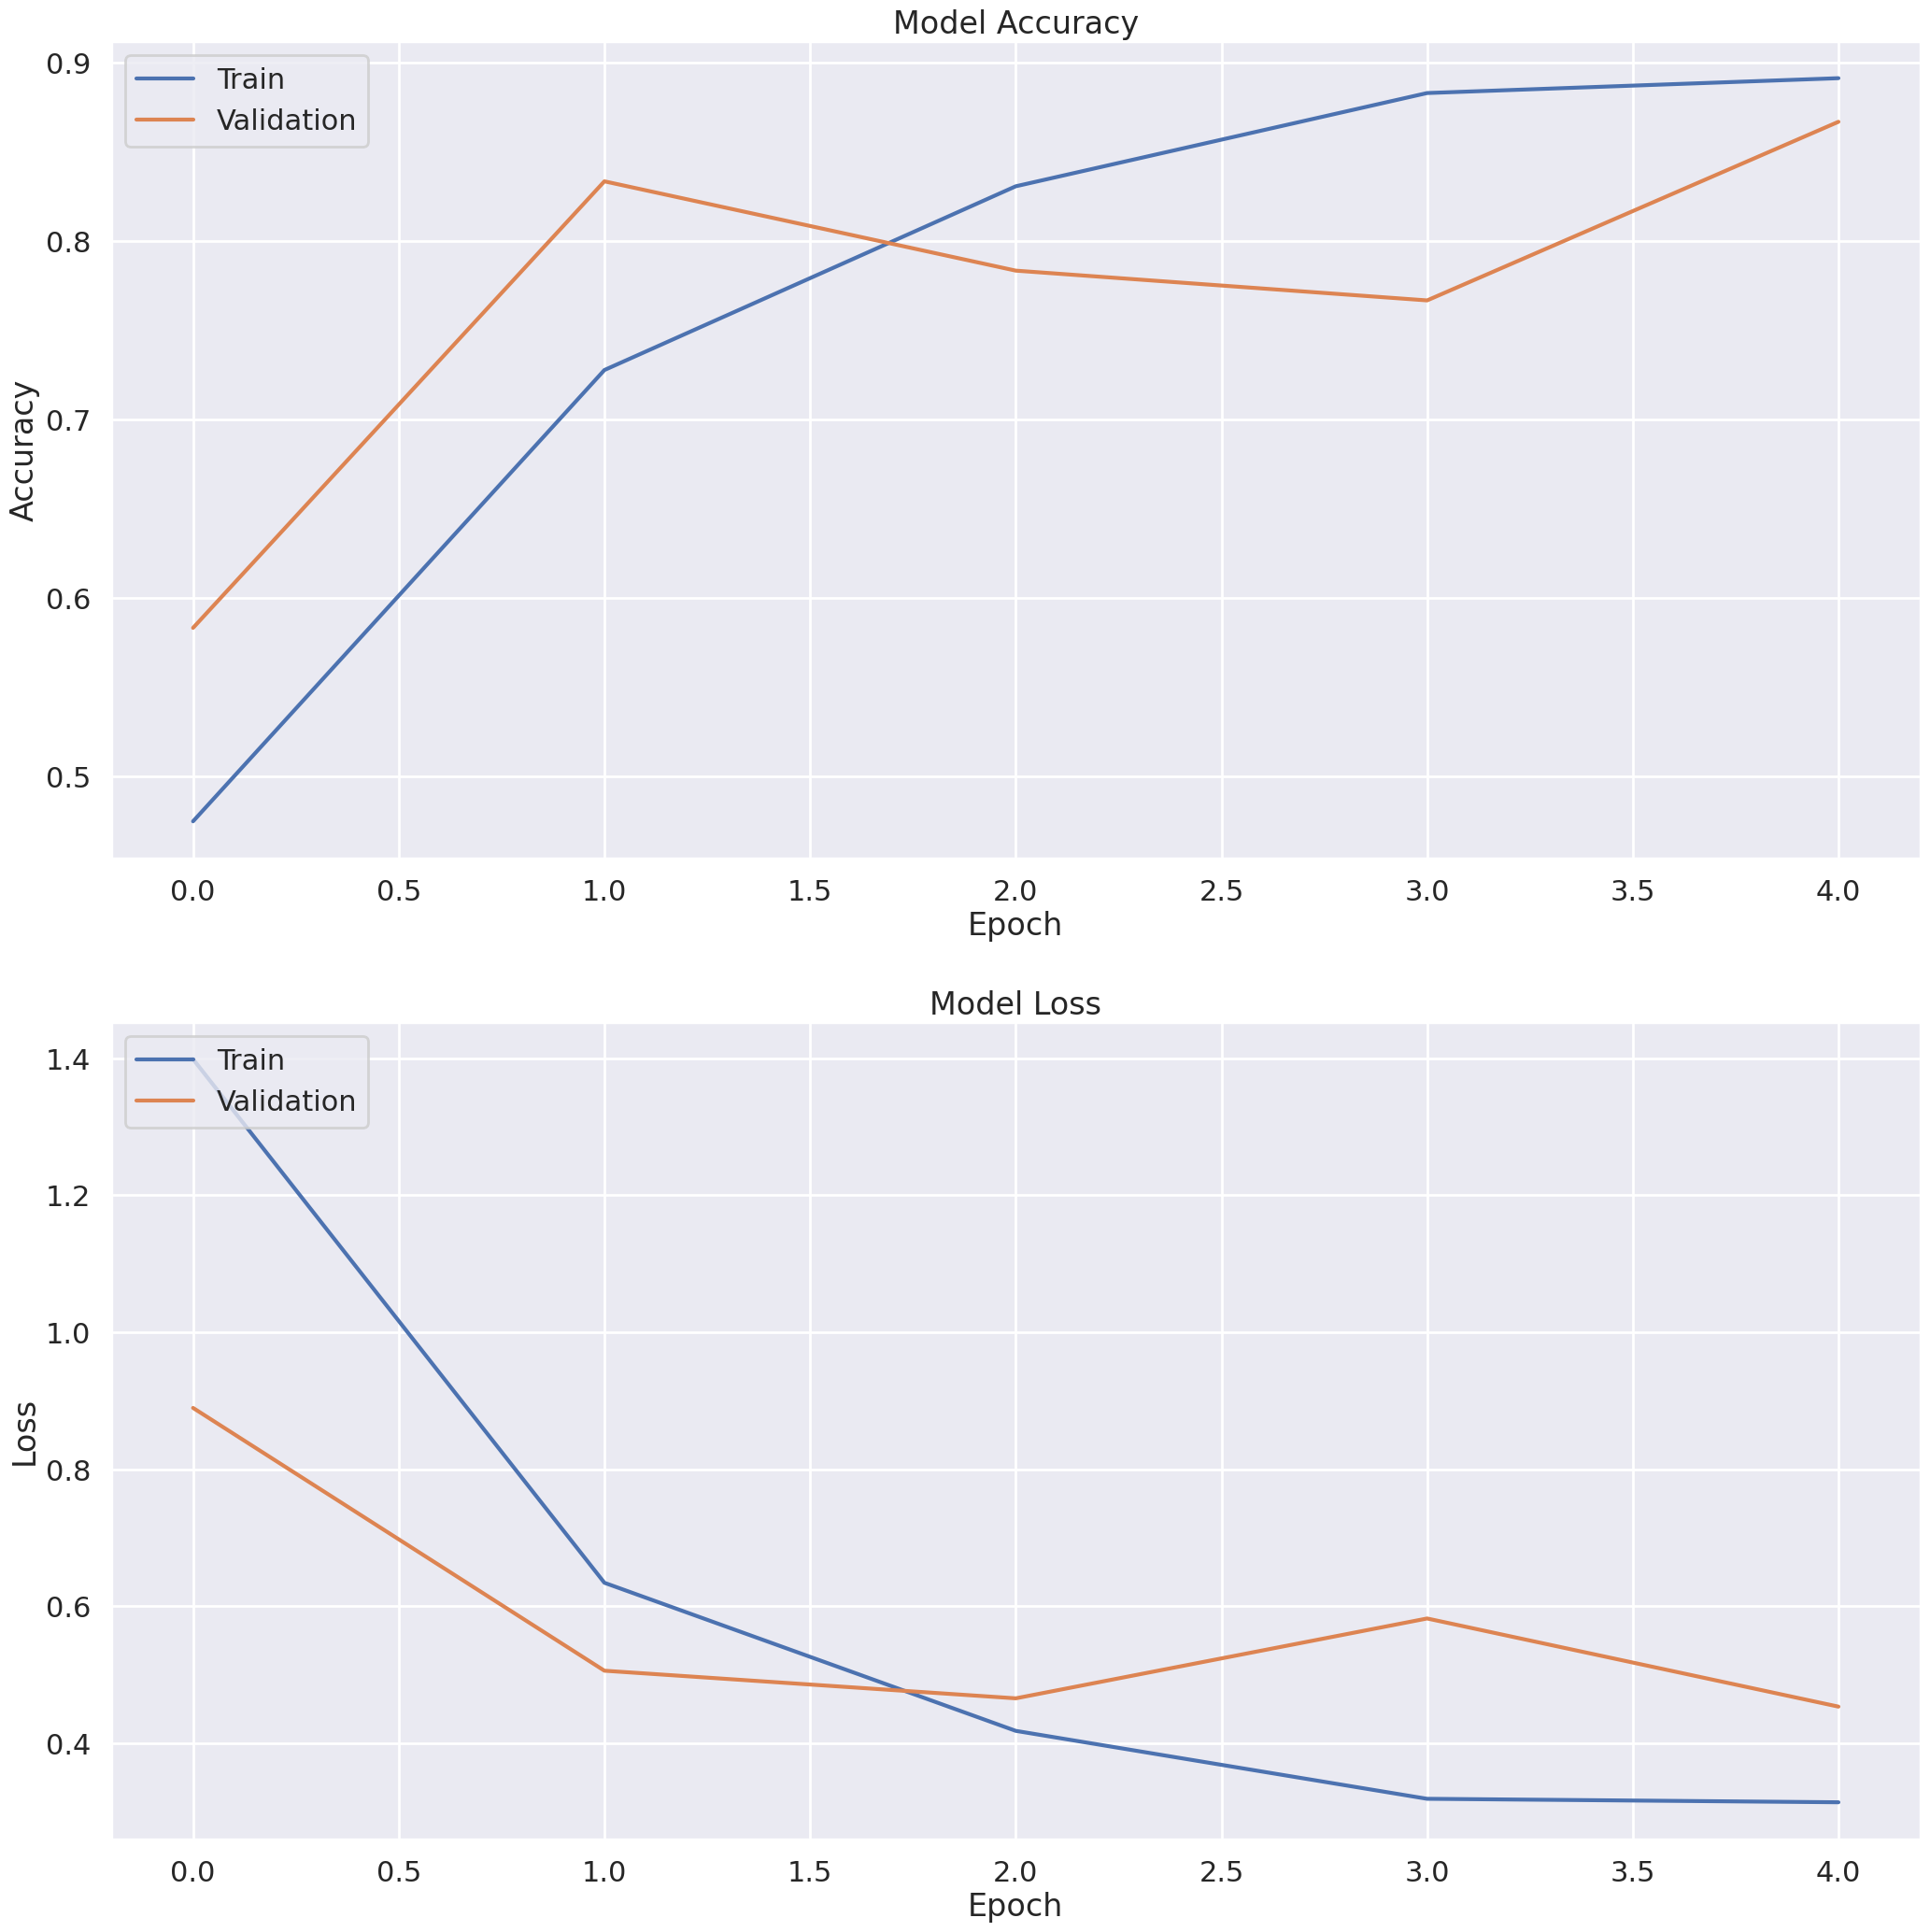

In [ ]:
# Plot accuracy and loss curves
sns.set_theme()
sns.set_context("poster")
figure(figsize=(25, 25), dpi=100)

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Save the trained model
model.save("model.h5")

In [ ]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Dataset/Test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important to keep labels in order for comparison
)

Found 150 images belonging to 3 classes.


5/5 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step


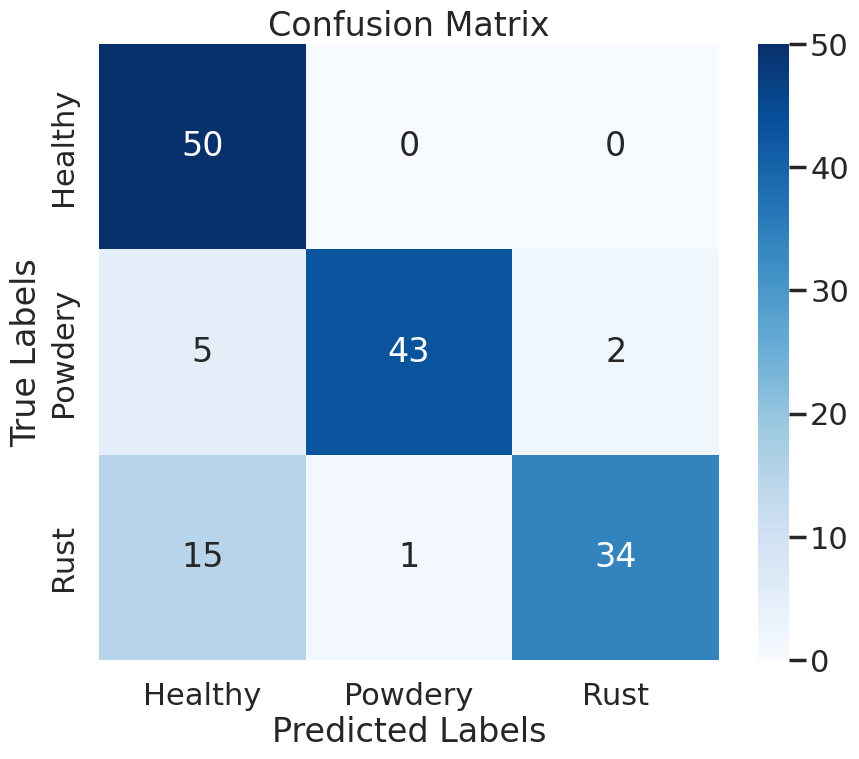

In [ ]:
# Predict labels for test data
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
# Get true labels
y_true = test_generator.classes

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

     Healthy       0.71      1.00      0.83        50
     Powdery       0.98      0.86      0.91        50
        Rust       0.94      0.68      0.79        50

    accuracy                           0.85       150
   macro avg       0.88      0.85      0.85       150
weighted avg       0.88      0.85      0.85       150



In [ ]:
# Function to preprocess an image for prediction
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

In [ ]:
# Predict the label of an image
def predict_image(image_path):
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()}
    predicted_label = labels[np.argmax(predictions)]
    print(f"Predicted label: {predicted_label}")
    return predicted_label

In [ ]:

# Example of prediction
predict_image('/content/drive/MyDrive/Dataset/Dataset/Test/Rust/82f49a4a7b9585f1.jpg')

# Evaluate the model on the test dataset
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Test',
                                                  target_size=(225, 225),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")
